## Solution a
there are very differents plots, but most of them has pattern easy to identify for the human eye, to cluster or clasify this patterns could be a trick for a machine

In [215]:
import numpy as np
from sklearn import cluster, datasets, mixture
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
from sklearn.cluster import SpectralClustering



# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

Text(0.5, 1.0, 'Blobs with Varied Variances')

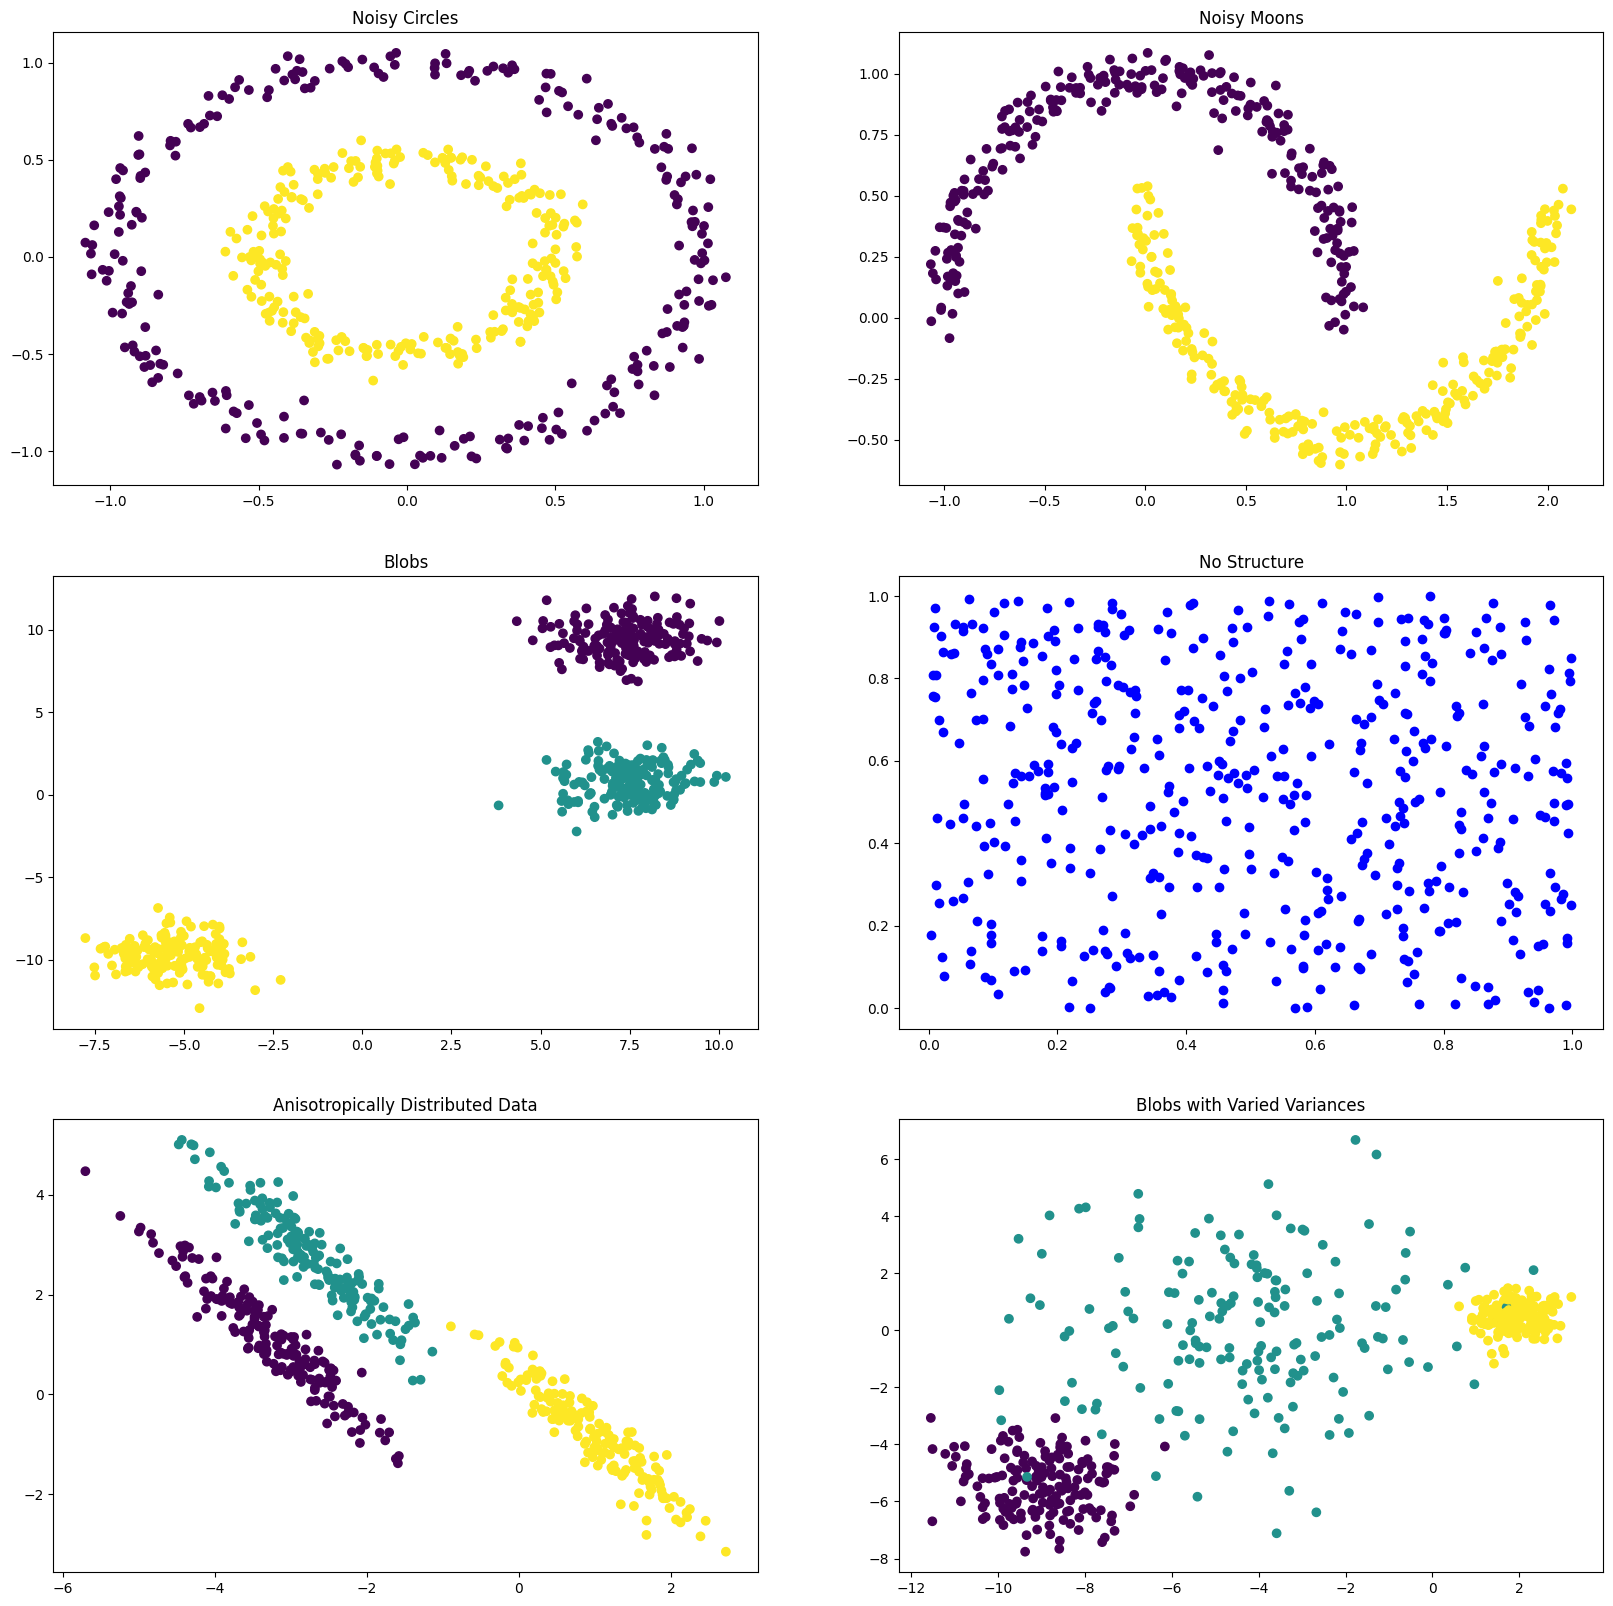

In [25]:

fig, axs = plt.subplots(3, 2, figsize=(20, 20))

# axs[0].figure(figsize=(5, 5))
axs[0,0].scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c=noisy_circles[1])
axs[0,0].set_title('Noisy Circles')

# axs[1].figure(figsize=(5, 5))
axs[0,1].scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c=noisy_moons[1])
axs[0,1].set_title('Noisy Moons')

axs[1,0].scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1])
axs[1,0].set_title('Blobs')

axs[1,1].scatter(no_structure[0][:, 0], no_structure[0][:, 1], c='blue')
axs[1,1].set_title('No Structure')

axs[2,0].scatter(aniso[0][:, 0], aniso[0][:, 1], c=aniso[1], cmap='viridis')
axs[2,0].set_title('Anisotropically Distributed Data')

axs[2,1].scatter(varied[0][:, 0], varied[0][:, 1], c=varied[1])
axs[2,1].set_title('Blobs with Varied Variances')

## Solution B

In [68]:
Dis=[]
clusters_to_try=[2,3,4,5]   
i=0
Dis.append((noisy_circles,'noisy_circles'))
Dis.append((noisy_moons,'noisy_moons')) 
Dis.append((blobs,'blobs'))
Dis.append((no_structure,'no_structure'))
Dis.append((aniso,'aniso'))
Dis.append((varied,'varied'))

In [ ]:
Dis[0] # Distribution
Dis[0][1] #Nombre
Dis[0][0][0] #data
Dis[0][0][1] #cluster


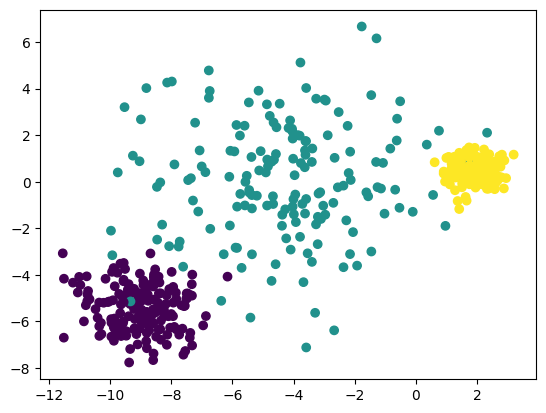

In [110]:

plt.scatter(Dis[5][0][0][:, 0], Dis[5][0][0][:, 1], c=Dis[5][0][1]) 

In [225]:
def create_plot(X,labels,n_clusters,axis,title):
        silhouette_vals = silhouette_samples(X, labels, metric='euclidean')
        silhouette_avg = silhouette_score(X, labels, metric='euclidean')
        y_lower, y_upper = 0, 0
        yticks = []
        for i, cluster in enumerate(np.unique(labels)):
            cluster_silhouette_vals = silhouette_vals[labels == cluster]
            cluster_silhouette_vals.sort()
            y_upper += len(cluster_silhouette_vals)
            color = cm.jet(float(i) / n_clusters)
            axs[n_clusters-2,axis].barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0,
                    edgecolor='none', color=color)
            yticks.append((y_lower + y_upper) / 2.)
            y_lower += len(cluster_silhouette_vals)
        axs[n_clusters-2,axis].axvline(silhouette_avg, color="red", linestyle="--")
        axs[n_clusters-2,axis].set_yticks(yticks,np.unique(labels))
        axs[n_clusters-2,axis].set_ylabel('Cluster')
        axs[n_clusters-2,axis].set_xlabel('Silhouette coefficient')
        axs[n_clusters-2,axis].set_title(title)

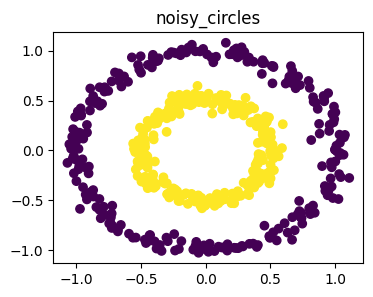

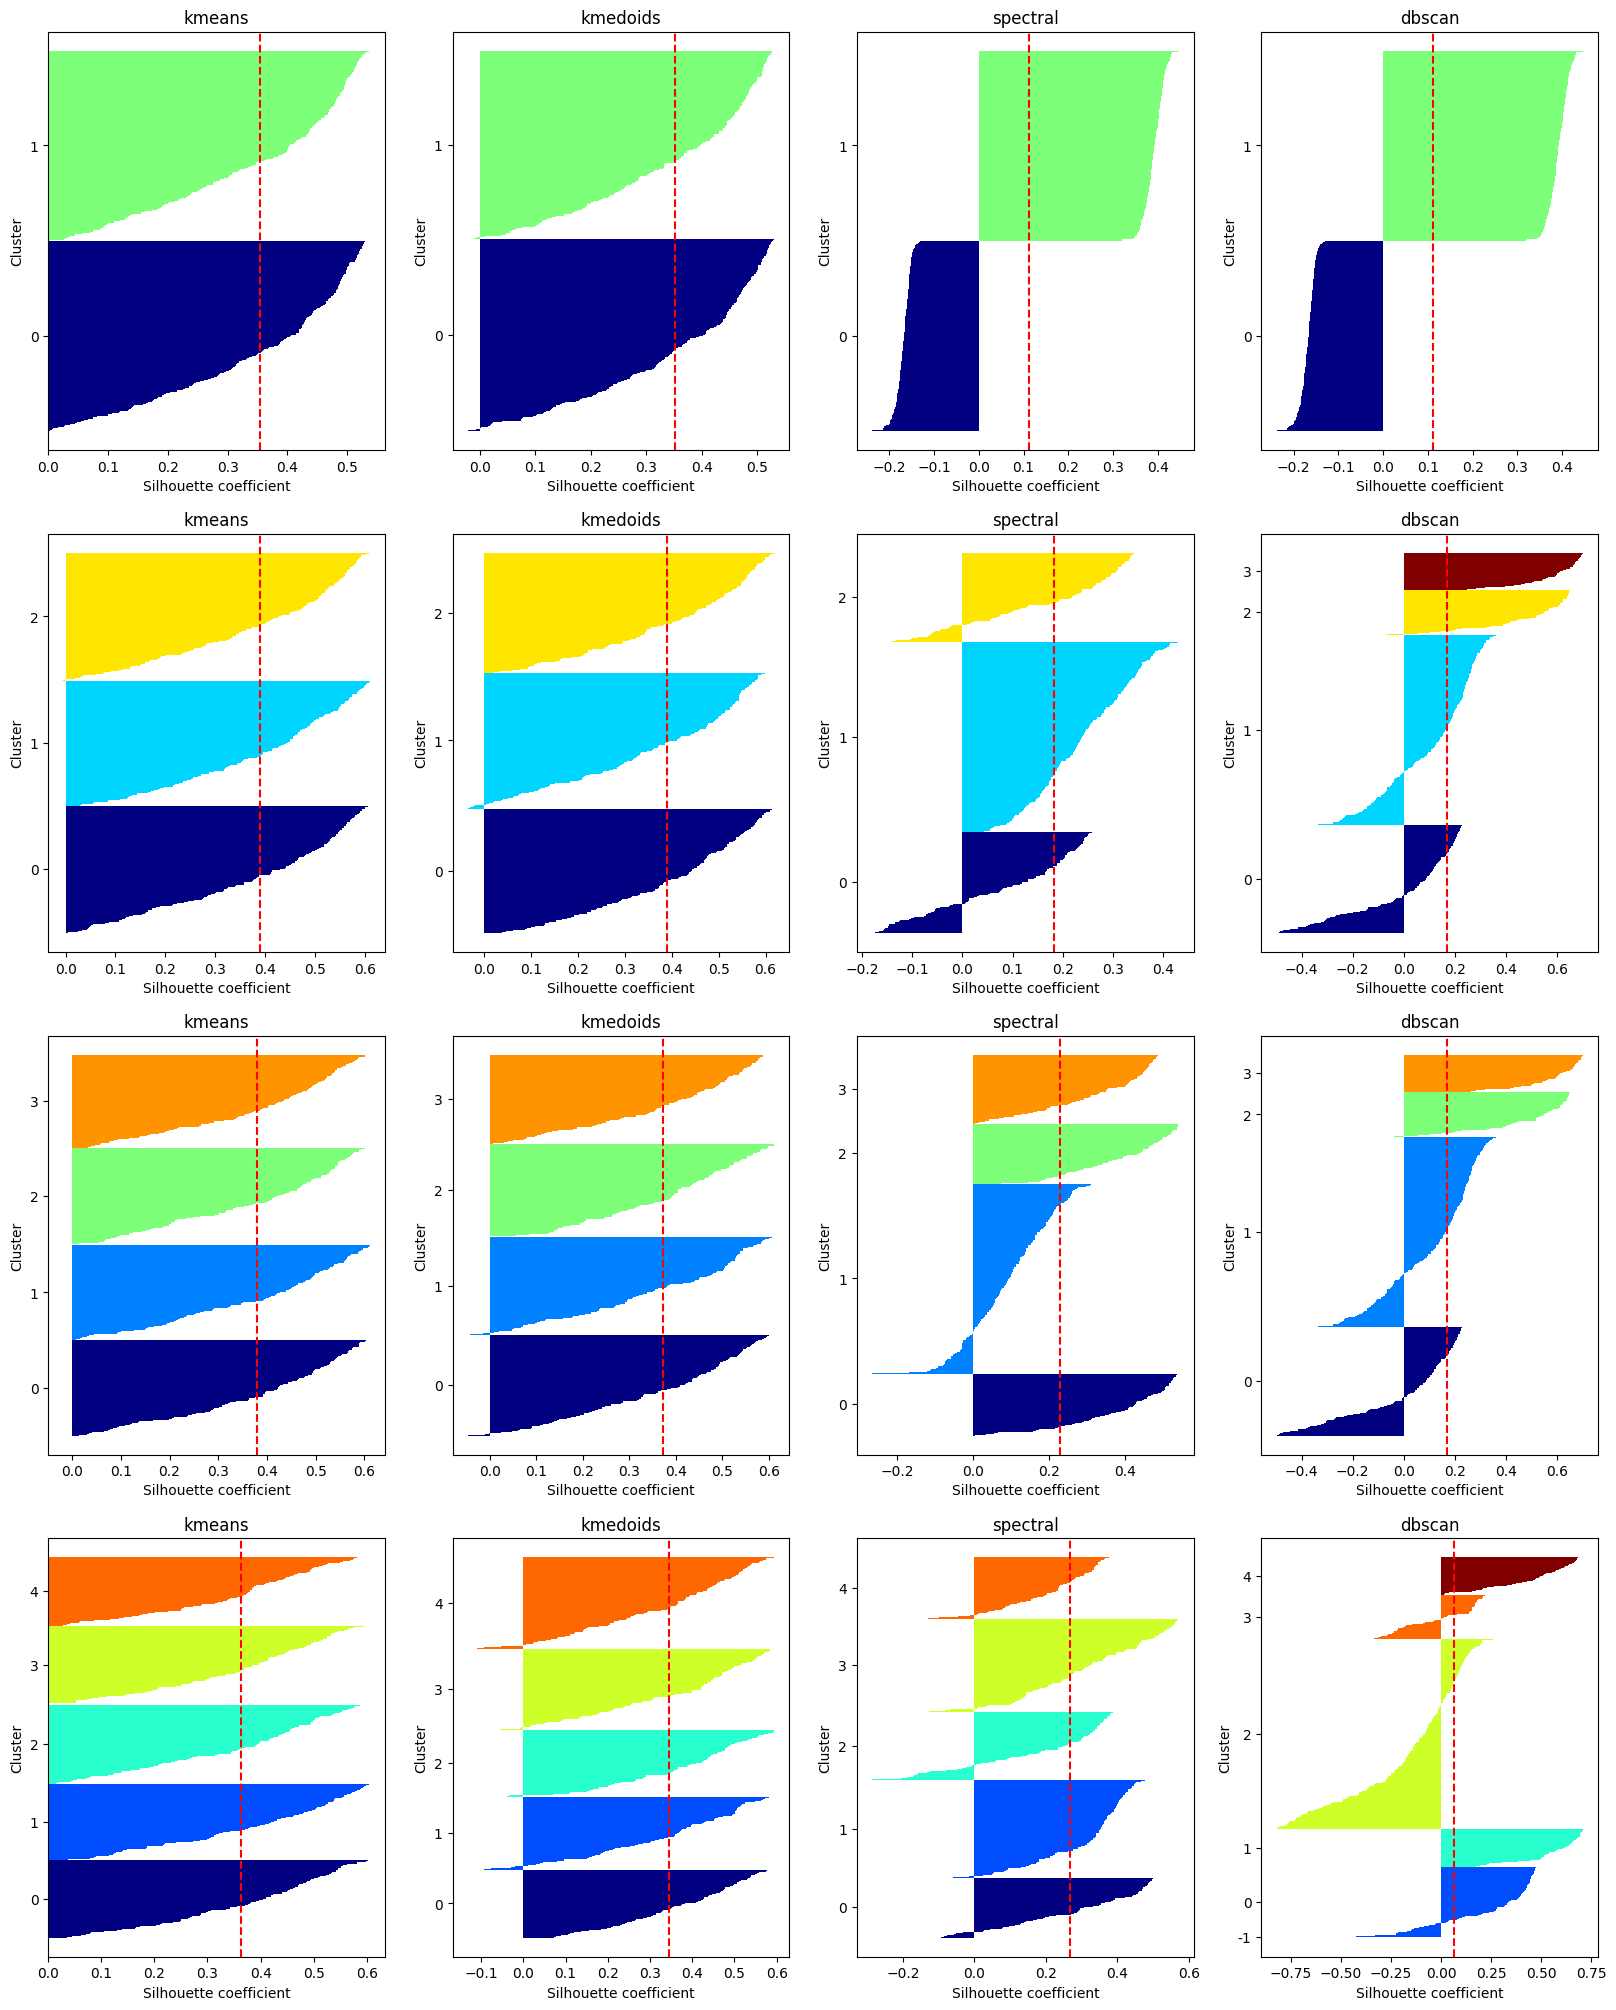

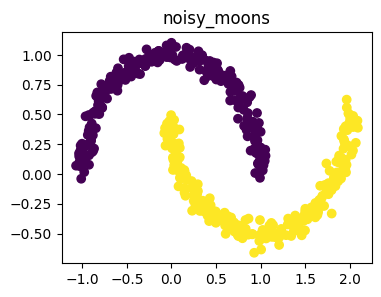

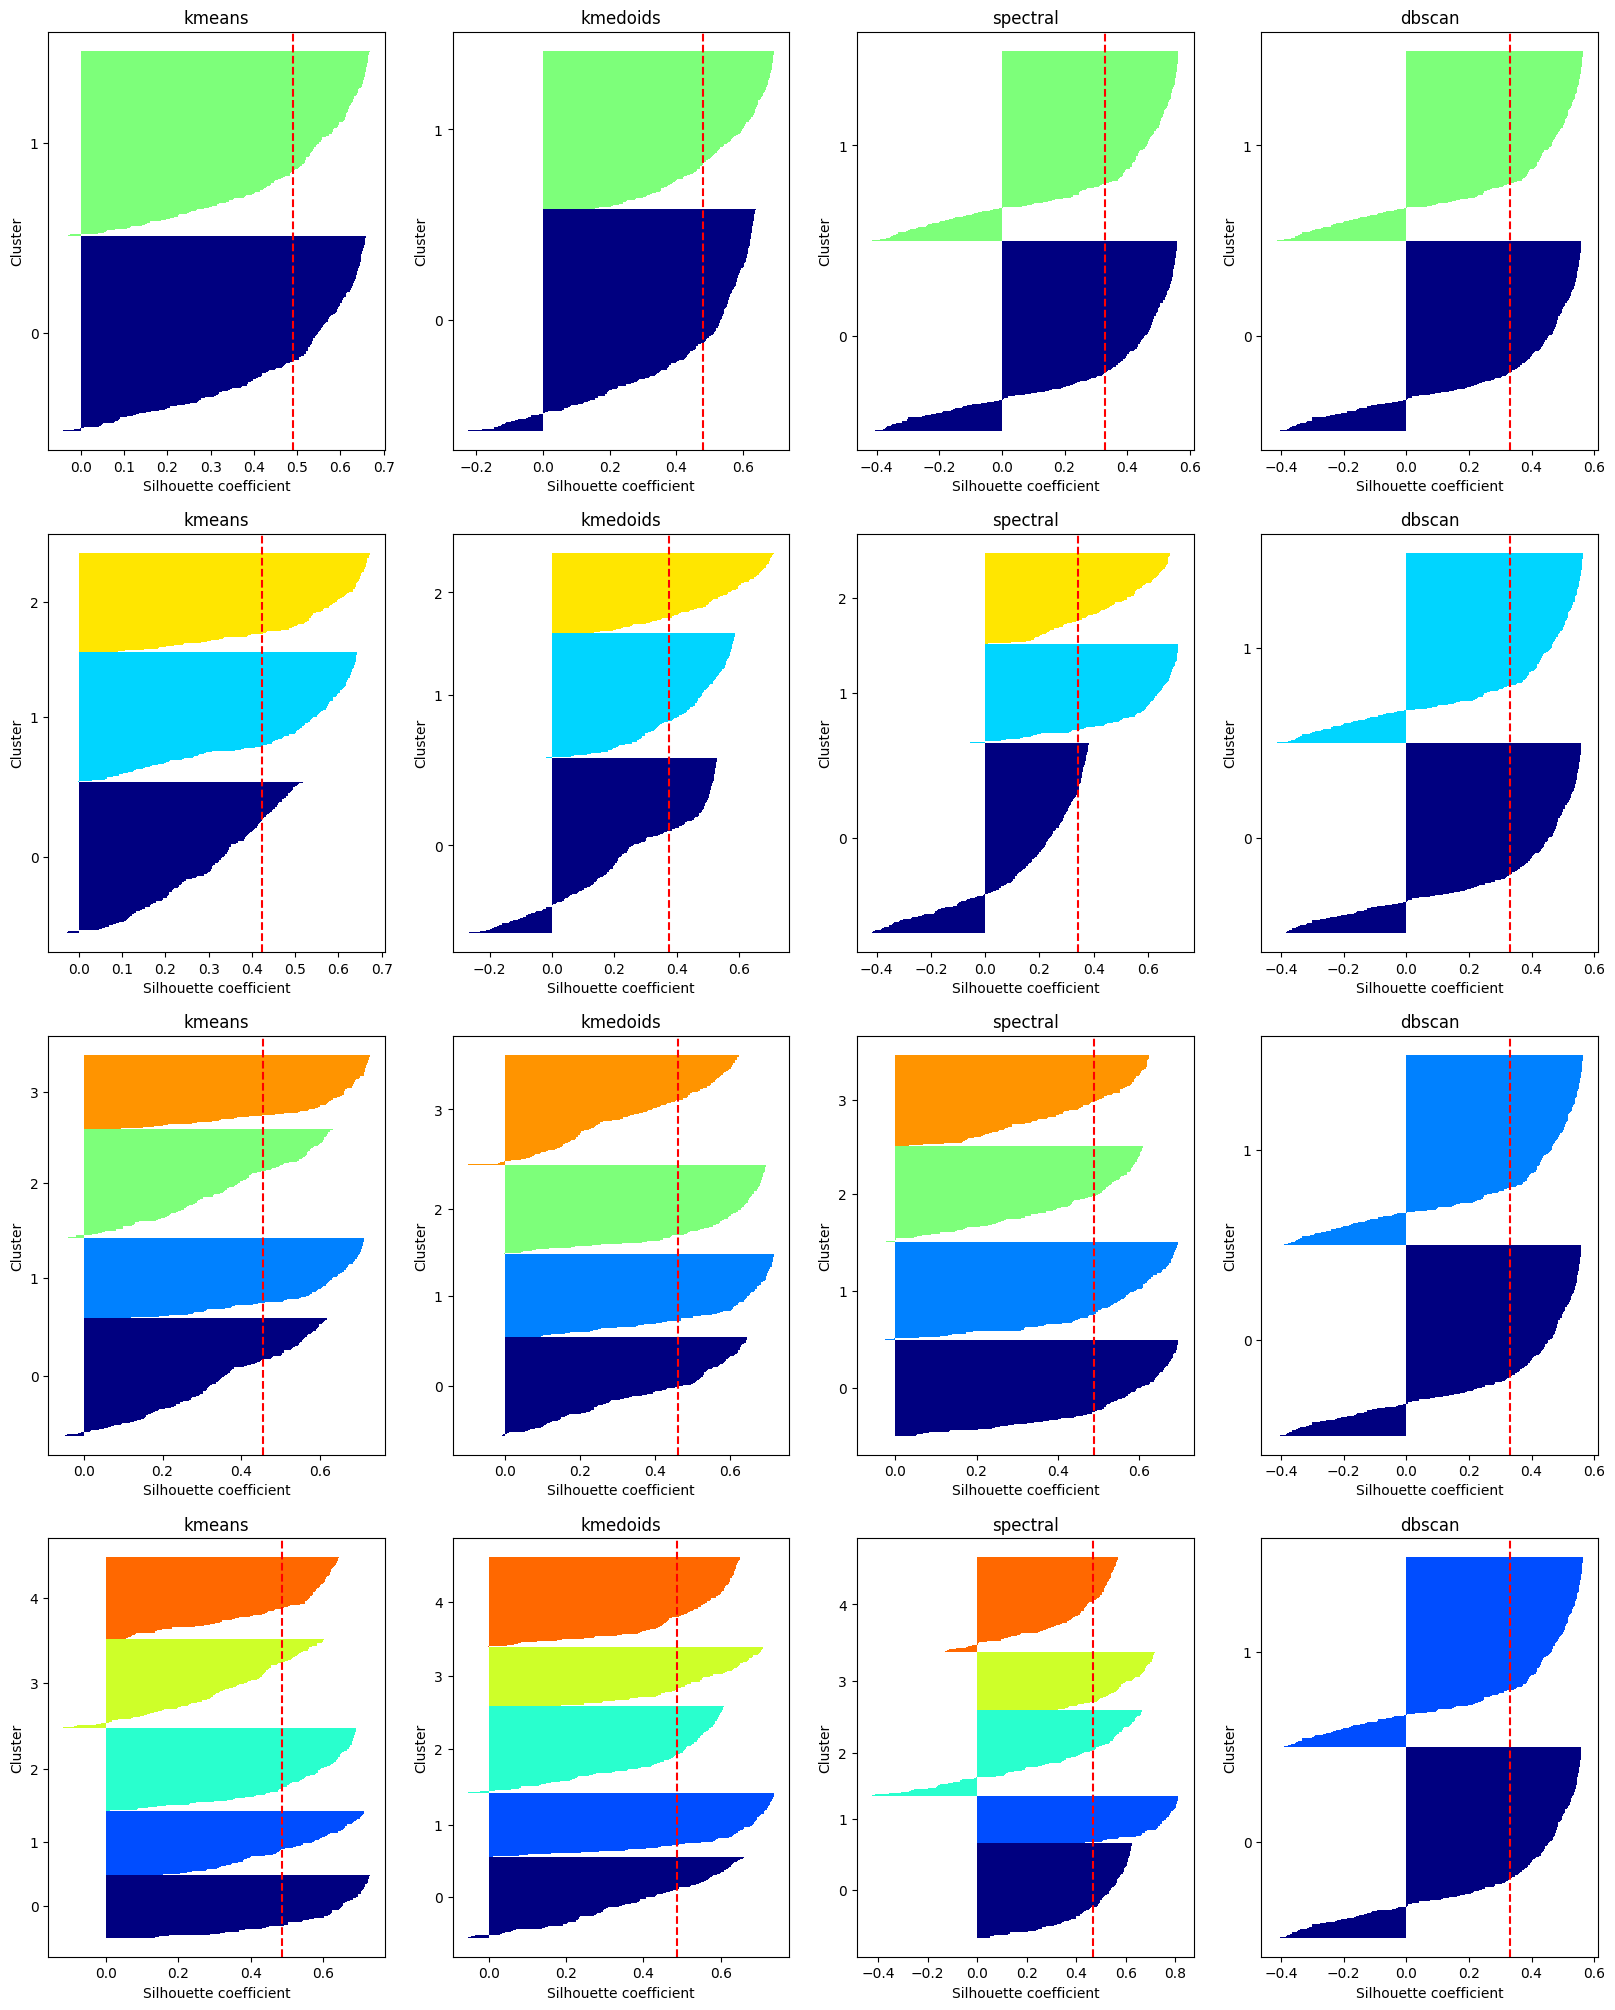

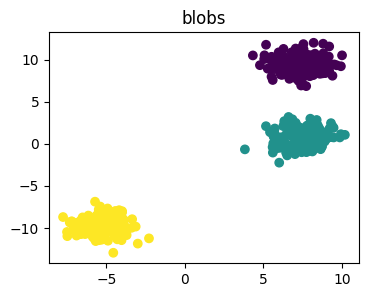

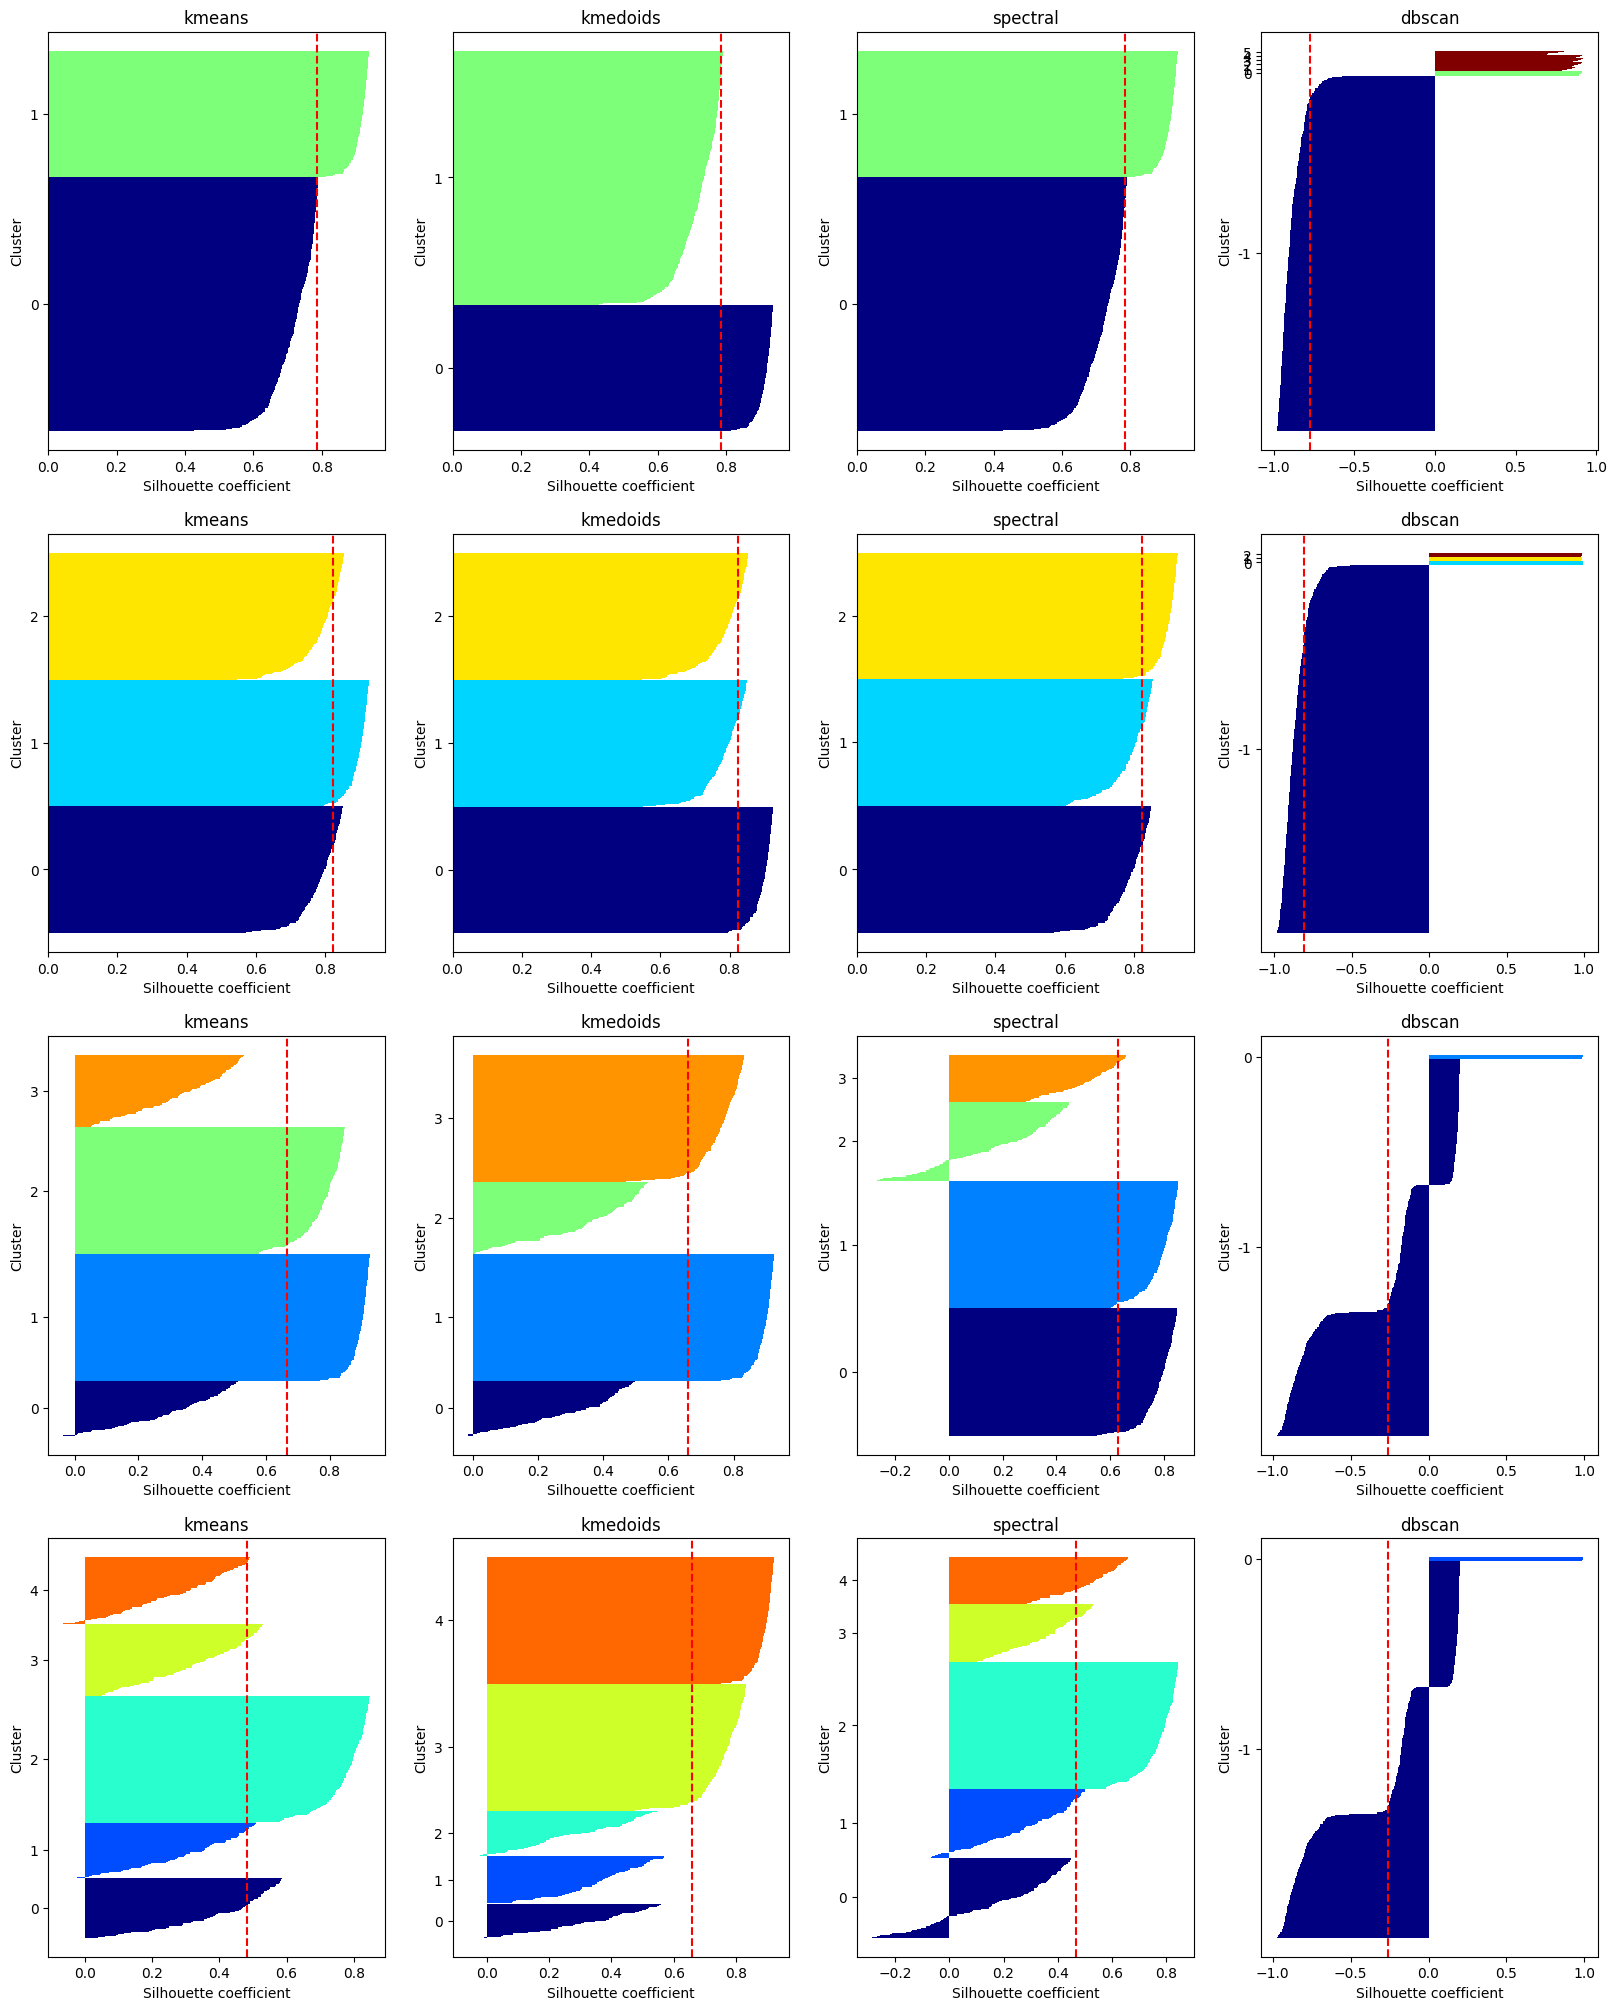

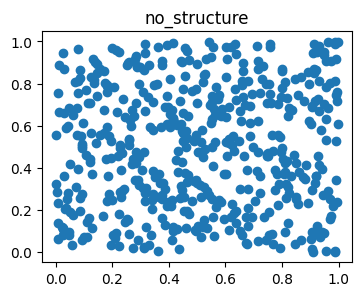

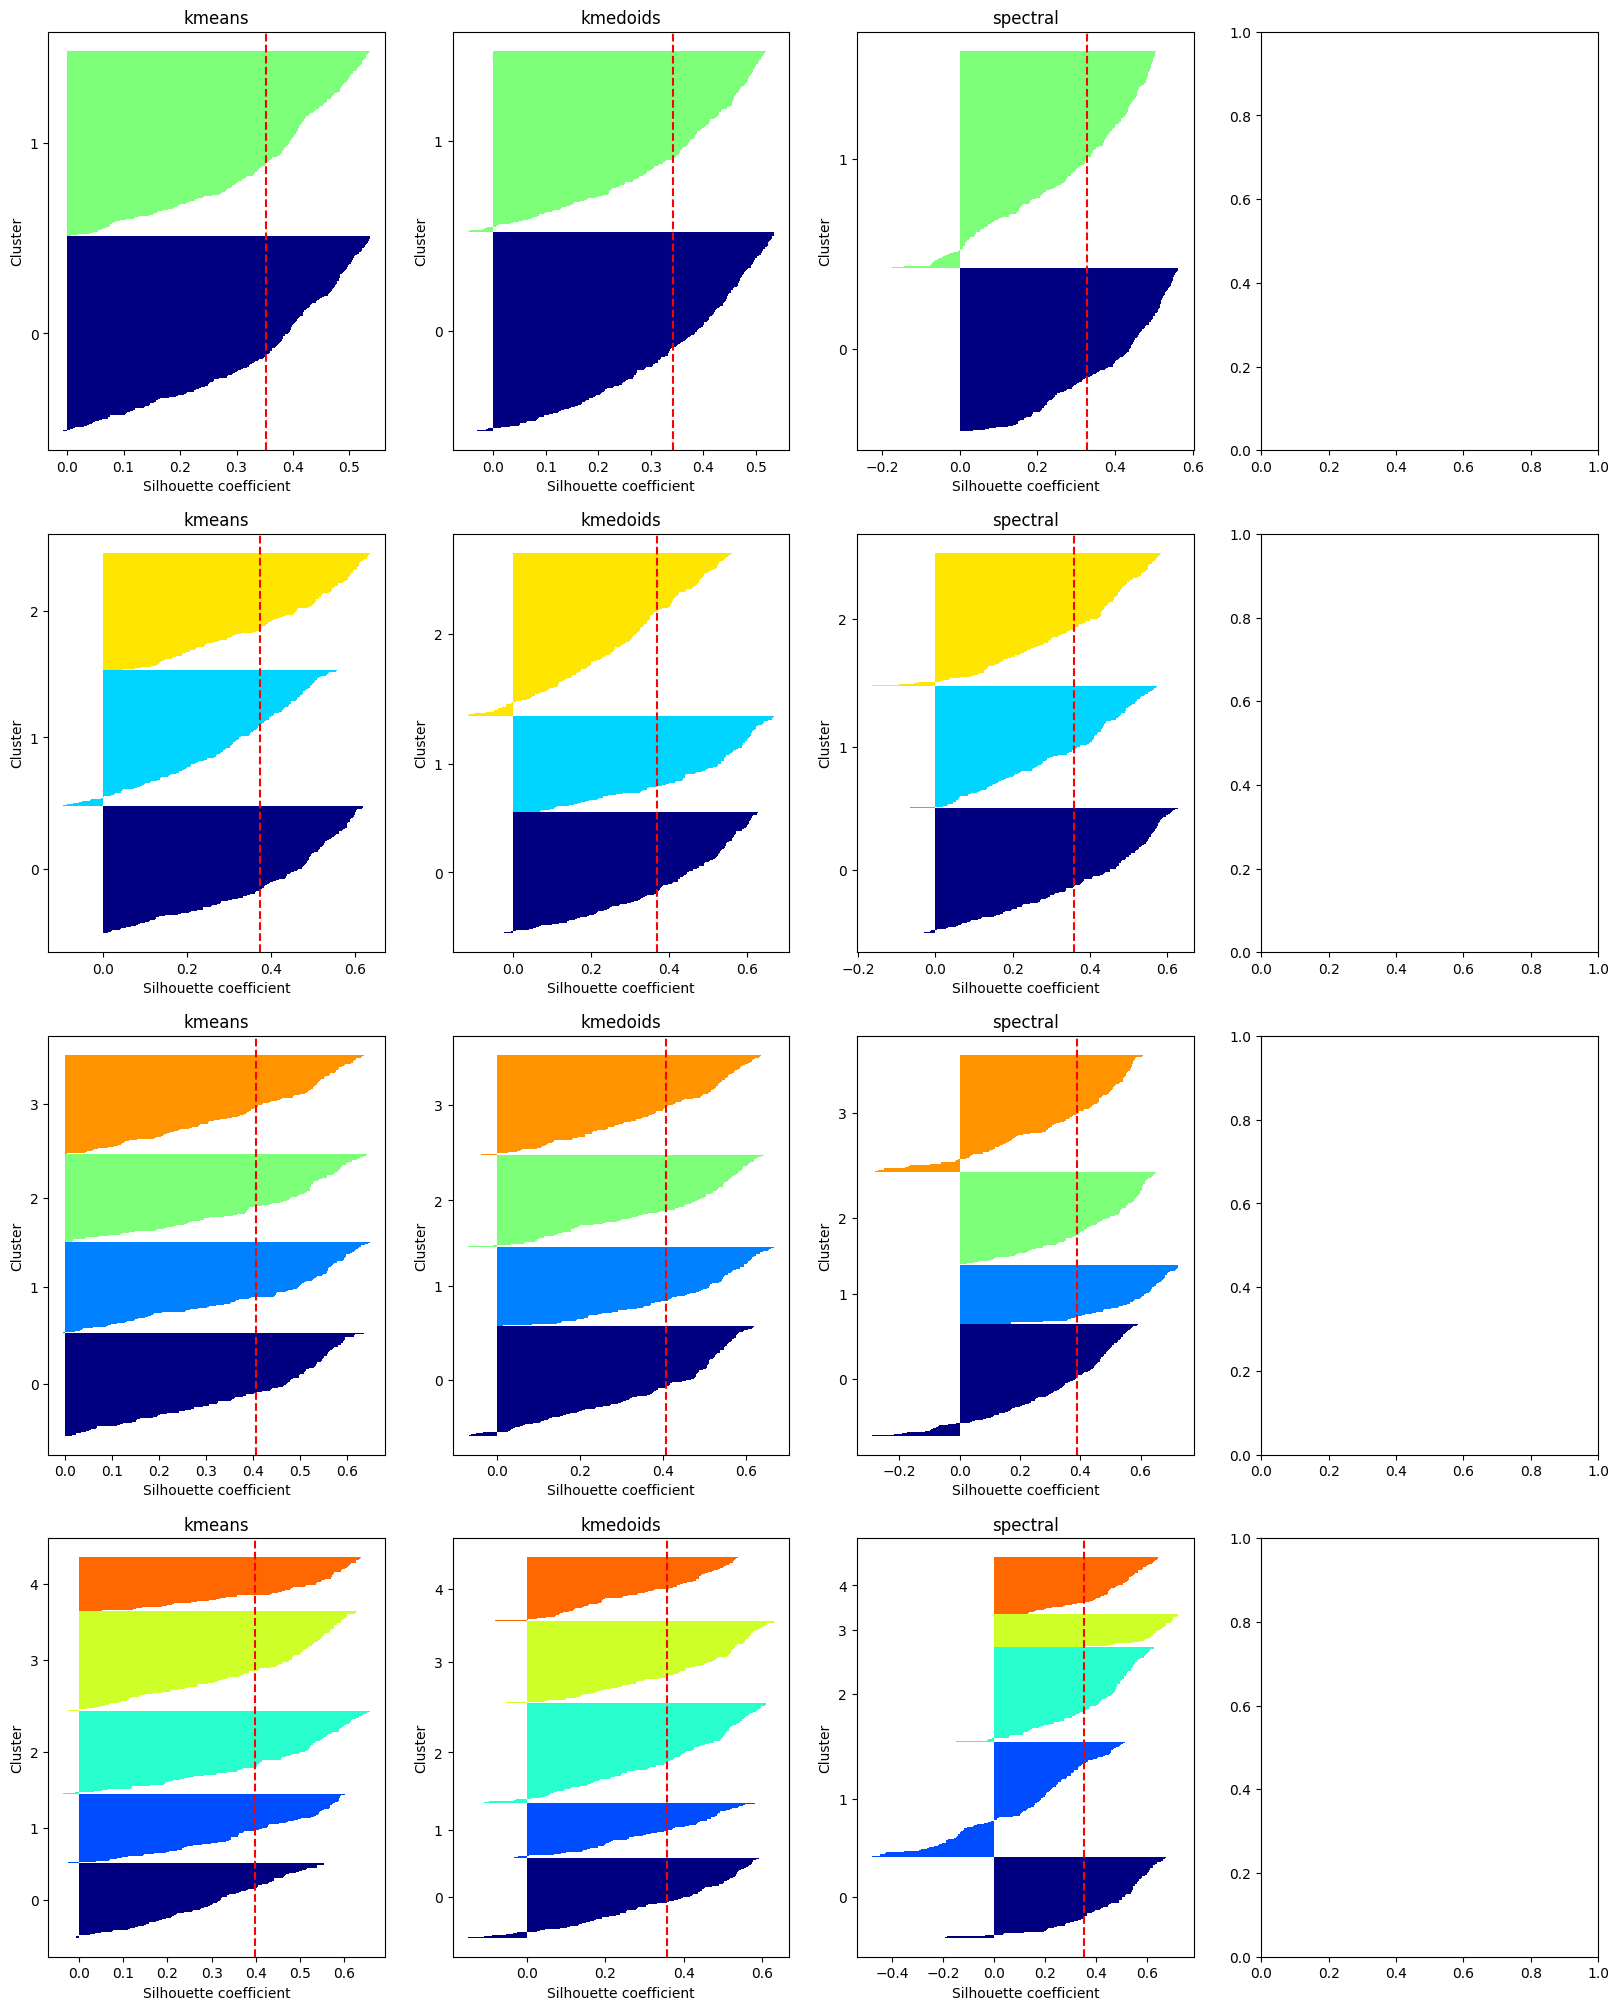

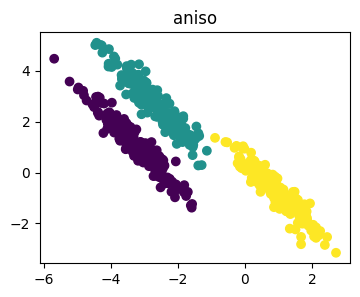

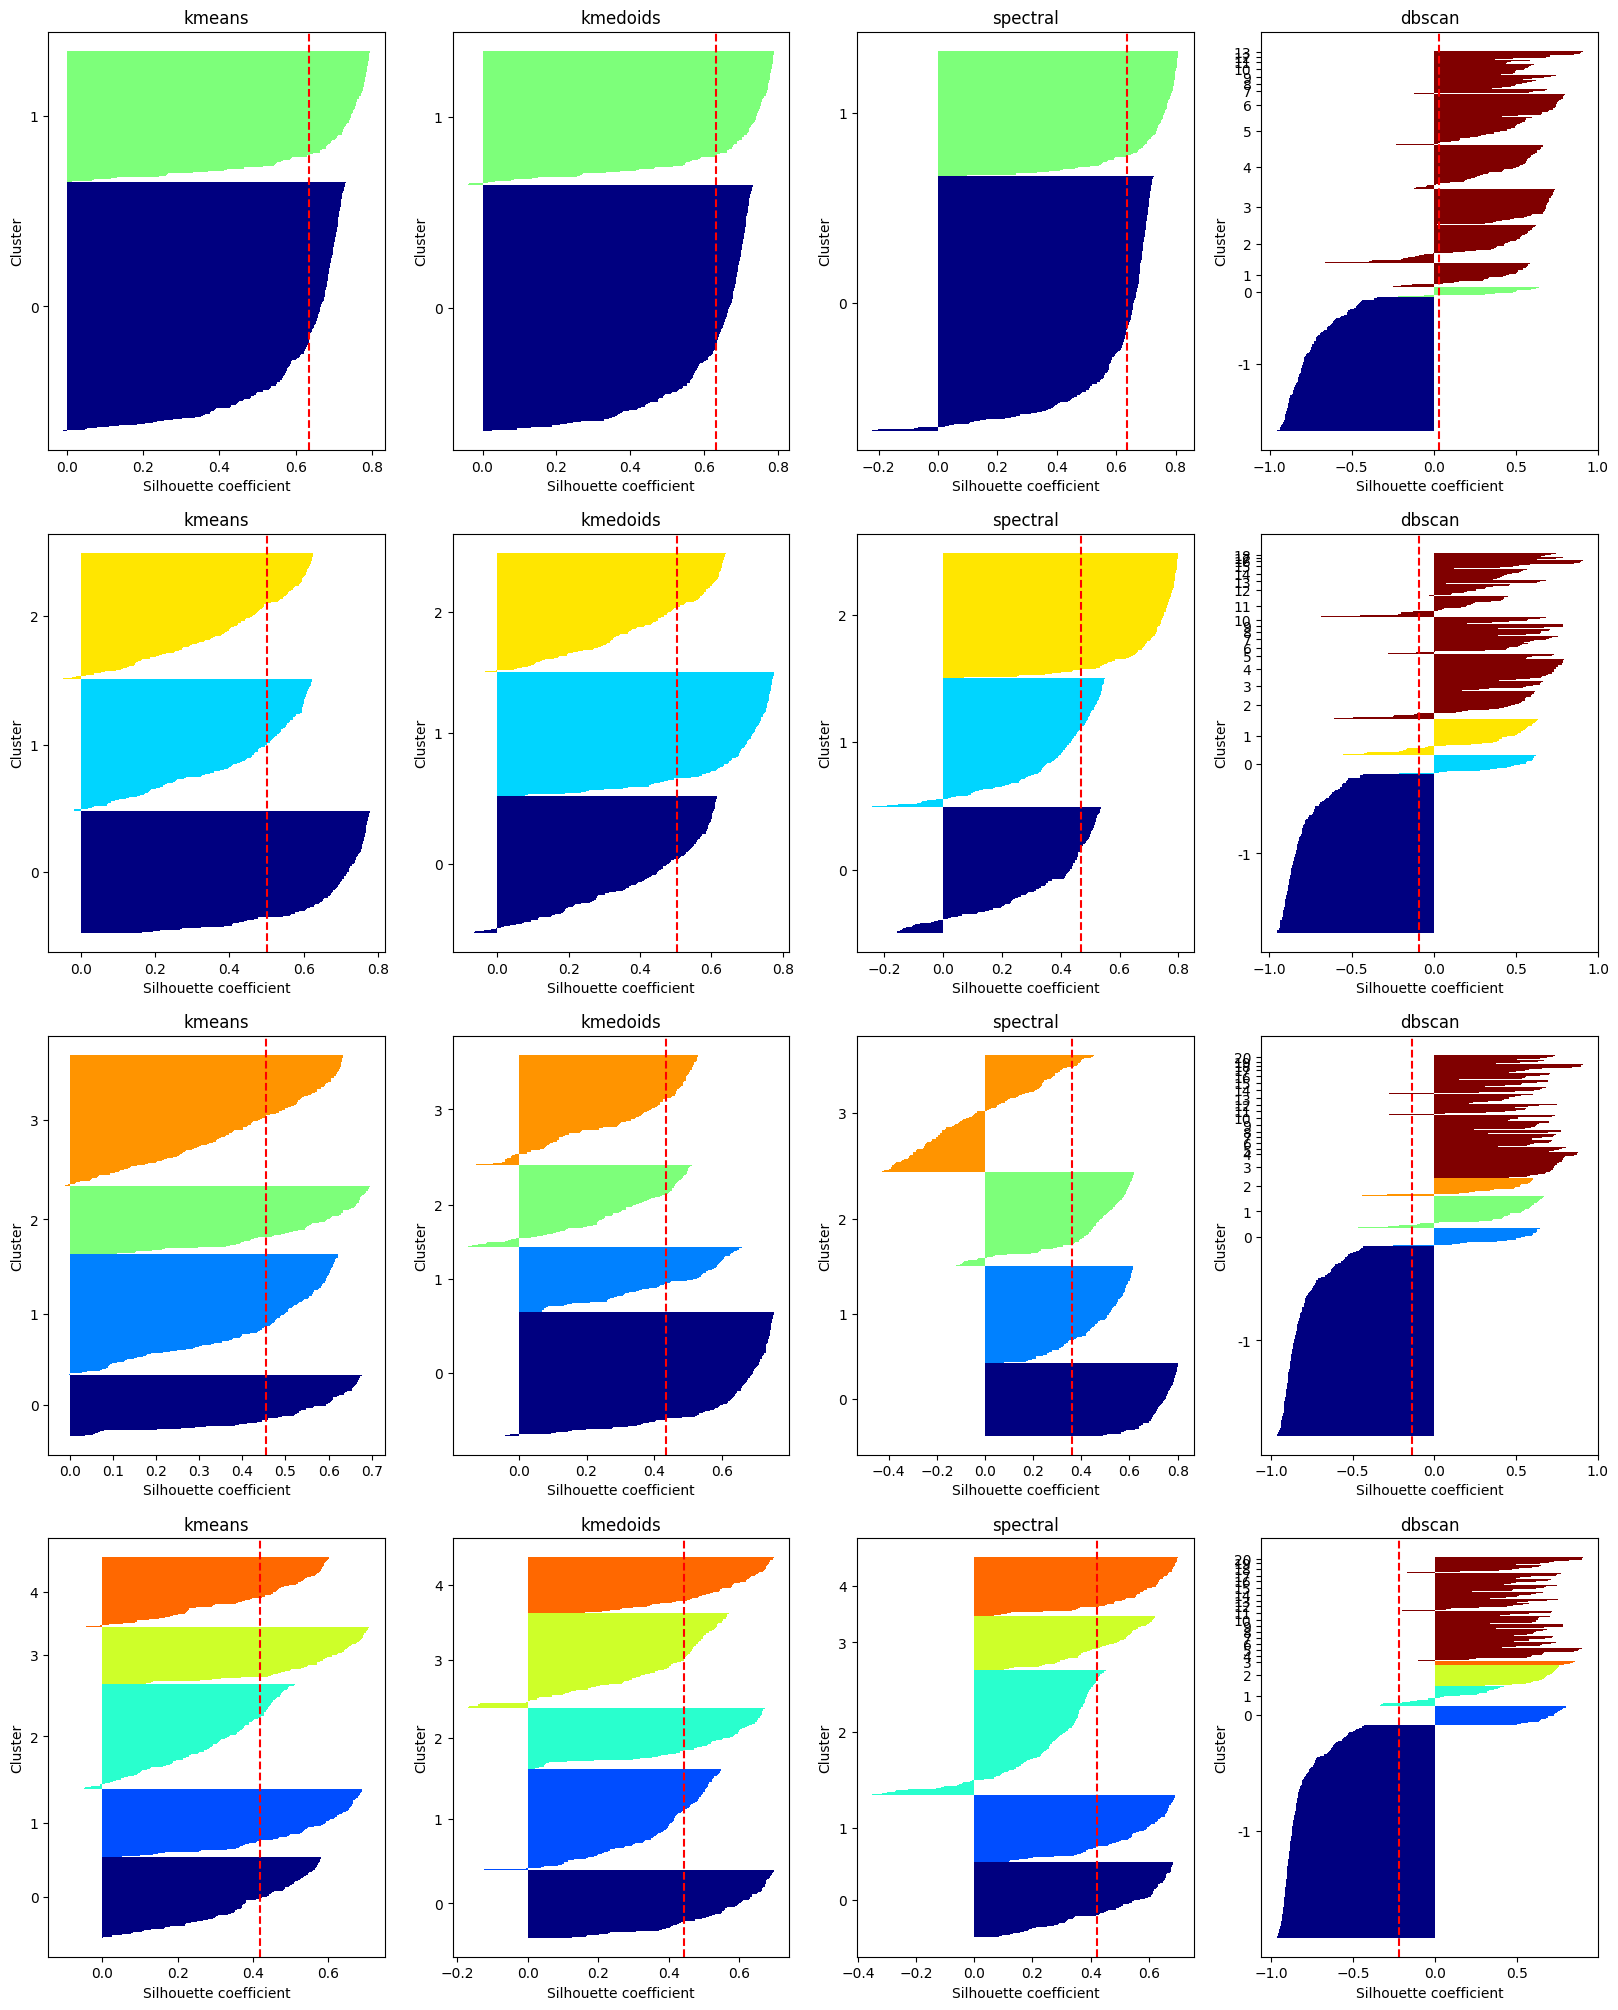

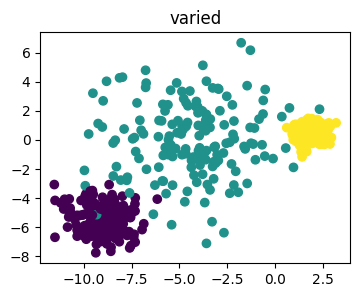

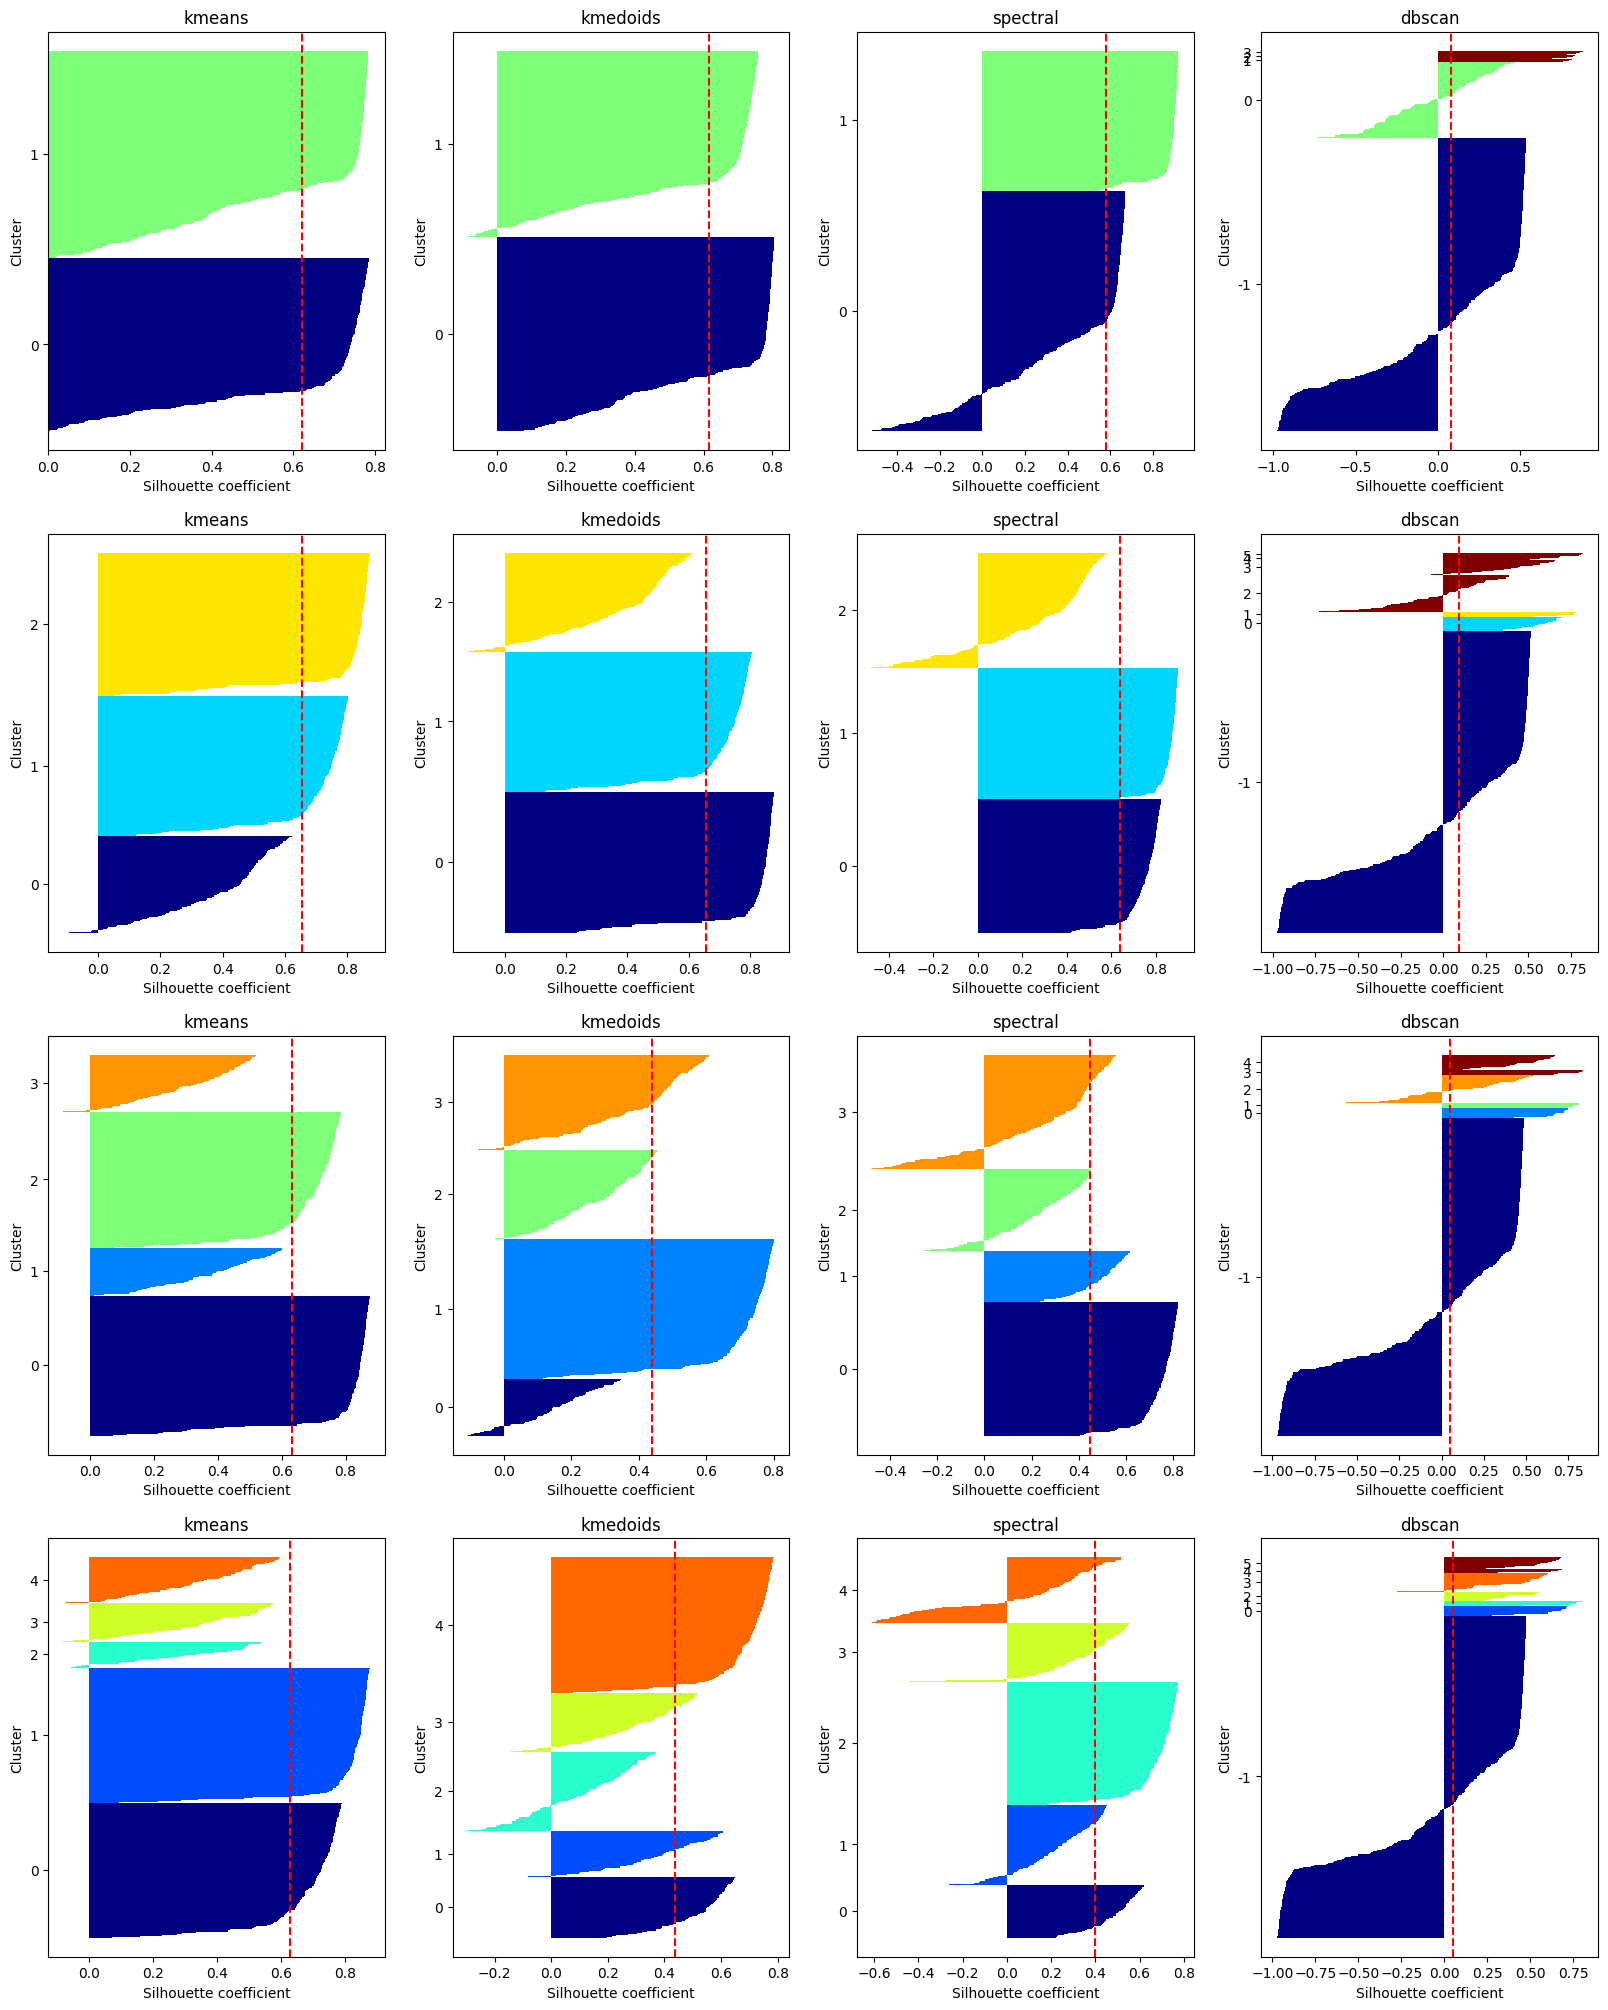

In [232]:

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
for distribution in range(len(Dis)):   
    fig, ax = plt.subplots(figsize=(4,3))
    ax.scatter(Dis[distribution][0][0][:, 0], Dis[distribution][0][0][:, 1], c=Dis[distribution][0][1]) 
    ax.set_title(Dis[distribution][1])
    plt.show()
    
    fig, axs = plt.subplots(len(clusters_to_try), 4, figsize=(20, 25))
    X=Dis[distribution][0][0]
    for n_clusters in clusters_to_try:
        kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(X)
        labels = kmeans.labels_

        create_plot(X=X,labels=labels,n_clusters=n_clusters,axis=0,title='kmeans')
#_------------------------------------------------------------------------------
        kmedoids = KMedoids(n_clusters=n_clusters, random_state=0).fit(X)
        labels = kmedoids.labels_

        create_plot(X=X,labels=labels,n_clusters=n_clusters,axis=1,title='kmedoids')

#_------------------------------------------------------------------------------
        spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0).fit(X)
        labels = spectral.labels_       

        create_plot(X=X,labels=labels,n_clusters=n_clusters,axis=2,title='spectral')

        
#_------------------------------------------------------------------------------
        dbscan = DBSCAN(eps=(0.1+(0.1/n_clusters)), min_samples=5).fit(X)
        labels = dbscan.fit_predict(X)

        if len(np.unique(labels))>1:
                create_plot(X=X,labels=labels,n_clusters=n_clusters,axis=3,title='dbscan')

                        
    # fig, axs = plt.subplots(1, 2, figsize=(20, 5))